## Temp
This is a temporary file for NTL data processing.

In [1]:
# # Cancel the comment to install all the packages and libraries needed.
# ! pip install rasterio matplotlib rasterstats ipynbname imageio tqdm rasterstats
# ! pip install numpy==1.24.4CURR_PATH

# Configuration
from pathlib import Path
import sys

CURR_PATH = Path().resolve()            # current file path
REPO_PATH = CURR_PATH.parent            # current repository path
DATA_PATH = REPO_PATH / "data"          # path for saving the data
DEMO_PATH = DATA_PATH / "demo-data"     # path for demo purpose 

SRC_PATH = REPO_PATH / "src"    # path for other sources
sys.path.append(str(SRC_PATH))  # add src to system path to import custom functions

# # Import customised scripts
from aggregation import*
from missingvalue import*
from visualization import*
from helpercollections import*

Clip the raster to interested area.

In [ ]:
import rasterio

min_lon, max_lon = 43.7, 45.0

min_lat, max_lat = 32.7, 33.8

city = 'baghdad'
baghdad_ntl_tiff = DATA_PATH / "baghdad-NTL-tiffs"
output_path = DATA_PATH

clip_tiff_by_bbox('baghdad', baghdad_ntl_tiff, output_path,
                      min_lon, min_lat, max_lon, max_lat,)

In [ ]:
city = 'baghdad'
baghdad_ntl_clipped = DATA_PATH / "baghdad-NTL-clipped"
output_path = DATA_PATH

fill_ntl_missing_data(
    city = 'baghdad',
    data_tiff_path = baghdad_ntl_clipped,
    output_path = DATA_PATH,
)

Generate TIFF Animation

Scanning percentiles: 100%|██████████| 701/701 [00:07<00:00, 88.71it/s]


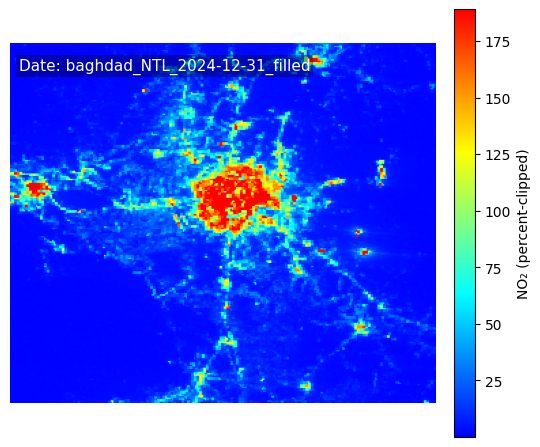

Animation saved to: D:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\data\animation-output\baghdad-NTL-animation.gif


In [2]:
ntl_baghdad_tif_dir = DATA_PATH / 'baghdad-NTL-filled'  
tiff_2_gif(ntl_baghdad_tif_dir, output_path=DATA_PATH, output_name="baghdad-NTL-animation", fps = 8)

Aggregate to Mesh

In [2]:
from aggregation import*

addis_meshes_path = DATA_PATH / 'addis-mesh-data'
baghdad_meshes_path = DATA_PATH / 'baghdad-mesh-data'

mesh_addis = DATA_PATH / "mesh-grid" / "grid_addis_ababa.gpkg"
mesh_baghdad = DATA_PATH / "mesh-grid" / "grid_baghdad.gpkg"

lyr_addis_name = fiona.listlayers(mesh_addis)[0]         # control layer number = 1 
lyr_baghdad_name = fiona.listlayers(mesh_baghdad)[0]

In [ ]:
# Aggregate Ethiopia - Addis Ababa
ntl_baghdad_tif_dir = DATA_PATH / 'baghdad-NTL-filled'  
aggregate_data(
    data_tiff_path=ntl_baghdad_tif_dir, 
    mesh_path=baghdad_meshes_path, 
    layer_name=lyr_baghdad_name,
    feature_name="NTL_mean"
    )

currently working on: 1/520, 2023-07-01


d:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\.conda\Lib\site-packages\pyogrio\geopandas.py:275: UserWarning: More than one layer found in 'baghdad-2023-07-01.gpkg': 'baghdad-2023-07-01' (default), 'grid_badhdad'. Specify layer parameter to avoid this warning.
  result = read_func(


currently working on: 2/520, 2023-07-02


d:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\.conda\Lib\site-packages\pyogrio\geopandas.py:275: UserWarning: More than one layer found in 'baghdad-2023-07-02.gpkg': 'baghdad-2023-07-02' (default), 'grid_badhdad'. Specify layer parameter to avoid this warning.
  result = read_func(


currently working on: 3/520, 2023-07-03


d:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\.conda\Lib\site-packages\pyogrio\geopandas.py:275: UserWarning: More than one layer found in 'baghdad-2023-07-03.gpkg': 'baghdad-2023-07-03' (default), 'grid_badhdad'. Specify layer parameter to avoid this warning.
  result = read_func(


currently working on: 4/520, 2023-07-04


d:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\.conda\Lib\site-packages\pyogrio\geopandas.py:275: UserWarning: More than one layer found in 'baghdad-2023-07-04.gpkg': 'baghdad-2023-07-04' (default), 'grid_badhdad'. Specify layer parameter to avoid this warning.
  result = read_func(


currently working on: 5/520, 2023-07-05


d:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\.conda\Lib\site-packages\pyogrio\geopandas.py:275: UserWarning: More than one layer found in 'baghdad-2023-07-05.gpkg': 'baghdad-2023-07-05' (default), 'grid_badhdad'. Specify layer parameter to avoid this warning.
  result = read_func(


currently working on: 6/520, 2023-07-06


d:\Projects\MSc_Group_Project\air-pollution-mobility-research-project\.conda\Lib\site-packages\pyogrio\geopandas.py:275: UserWarning: More than one layer found in 'baghdad-2023-07-06.gpkg': 'baghdad-2023-07-06' (default), 'grid_badhdad'. Specify layer parameter to avoid this warning.
  result = read_func(


currently working on: 7/520, 2023-07-07
currently working on: 8/520, 2023-07-08
currently working on: 9/520, 2023-07-09
currently working on: 10/520, 2023-07-10
currently working on: 11/520, 2023-07-11
currently working on: 12/520, 2023-07-12
currently working on: 13/520, 2023-07-13
currently working on: 14/520, 2023-07-14
currently working on: 15/520, 2023-07-15
currently working on: 16/520, 2023-07-16
currently working on: 17/520, 2023-07-17


### 2.1 Correlation Matrix

**Visualisation**

Show aggregated result in 2023-01-01 in Baghdad.

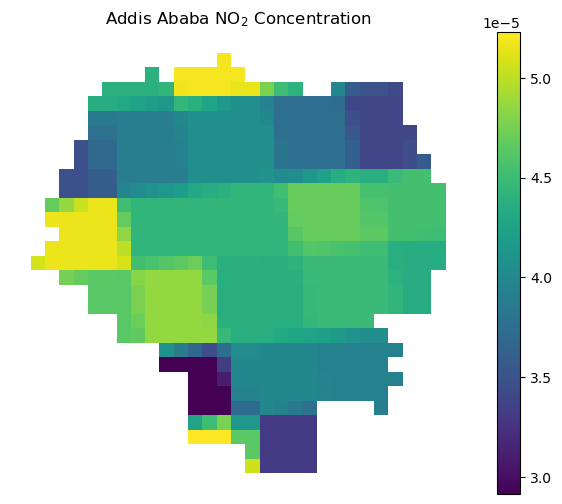

In [ ]:
# demo_mesh = gpd.read_file(DEMO_PATH / 'addis-ababa-2023-01-01.gpkg')
# plot_mesh(mesh=demo_mesh, feature='NTL_mean', title="Baghdad Night Time Light Distribution", show_edges=False)
# plt.show()

Generate mesh 2 animation

In [ ]:
baghdad_gpkg_path = DATA_PATH / 'baghdad-ntl-mesh-data'

mesh_2_gif(
    gpkg_path=baghdad_gpkg_path, 
    output_path=DATA_PATH,
    output_name= "baghdad-ntl-animation", 
    feature='NTL_mean',
   )
plt.show()